In [ ]:
!head nyc_taxi_trip_duration.csv

id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.95391845703125,40.77887344360352,-73.96387481689453,40.77116394042969,N,400
id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.98831176757811,40.73174285888672,-73.9947509765625,40.69493103027344,N,1100
id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314453125,40.721458435058594,-73.94802856445312,40.774917602539055,N,1635
id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961669921875,40.75971984863281,-73.95677947998048,40.780628204345696,N,1141
id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.01712036132812,40.70846939086913,-73.9881820678711,40.740631103515625,N,848
id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.99361419677734,40.75188446044922,-73.99542236328125,40.72386169433594,N,1455
id2429028,1,2016-04-20 20:30:14

In [1]:
import pandas as pd

df = pd.read_csv('nyc_taxi_trip_duration.csv')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [2]:
from math import radians, cos, sin, acos, asin

geo_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
df[geo_columns] = df[geo_columns].apply(lambda x: x.apply(radians))
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-1.290739,0.711726,-1.290913,0.711591,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-1.291340,0.710903,-1.291452,0.710261,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-1.291497,0.710724,-1.290637,0.711657,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-1.290875,0.711391,-1.290789,0.711756,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-1.291842,0.710497,-1.291337,0.711058,N,848


In [3]:
def distance(test):
  longitude1, latitude1, longitude2, latitude2 = test
  degree_kilometres = 111.2
  latitude_dif = degree_kilometres * abs(latitude2 - latitude1)
  longitude_dif = abs(longitude1 - longitude2)
  AD = degree_kilometres * cos(radians(latitude1)) * longitude_dif
  BC = degree_kilometres * cos(radians(latitude2)) * longitude_dif
  temp = (AD - BC) / 2
  H = (latitude_dif ** 2 - temp ** 2) ** 0.5
  return ((max(AD, BC) - temp) ** 2 + H ** 2) ** 0.5 * 1000

df['metres'] = pd.DataFrame(map(distance, df[geo_columns].values))

In [4]:
df['speed'] = df['metres'] / df['trip_duration']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 13896 to 697620
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  38 non-null     object 
 1   vendor_id           38 non-null     int64  
 2   pickup_datetime     38 non-null     object 
 3   dropoff_datetime    38 non-null     object 
 4   passenger_count     38 non-null     int64  
 5   pickup_longitude    38 non-null     float64
 6   pickup_latitude     38 non-null     float64
 7   dropoff_longitude   38 non-null     float64
 8   dropoff_latitude    38 non-null     float64
 9   store_and_fwd_flag  38 non-null     object 
 10  trip_duration       38 non-null     int64  
 11  metres              38 non-null     float64
 12  speed               38 non-null     float64
dtypes: float64(6), int64(3), object(4)
memory usage: 4.2+ KB


(array([24.,  7.,  5.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([ 1.09711908,  3.73016714,  6.3632152 ,  8.99626326, 11.62931133,
        14.26235939, 16.89540745, 19.52845551, 22.16150358, 24.79455164,
        27.4275997 ]),
 <BarContainer object of 10 artists>)

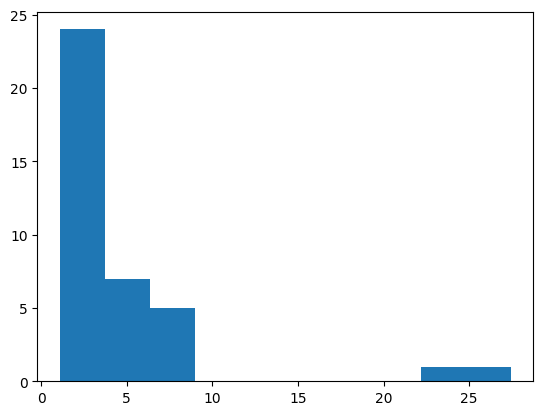

In [17]:
import matplotlib.pyplot as plt

temp = df[df['speed'] > 1]
temp.info()
plt.hist(temp['speed'])

In [7]:
df['passenger_count'].unique()

array([1, 2, 6, 3, 4, 5, 0, 7, 9])

In [8]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,metres,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-1.290739,0.711726,-1.290913,0.711591,N,400,24.437998,0.061095
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-1.291340,0.710903,-1.291452,0.710261,N,1100,72.529246,0.065936
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-1.291497,0.710724,-1.290637,0.711657,N,1635,141.114186,0.086308
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-1.290875,0.711391,-1.290789,0.711756,N,1141,41.674132,0.036524
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-1.291842,0.710497,-1.291337,0.711058,N,848,83.964749,0.099015


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([7. , 7.2, 7.4, 7.6, 7.8, 8. , 8.2, 8.4, 8.6, 8.8, 9. ]),
 <BarContainer object of 10 artists>)

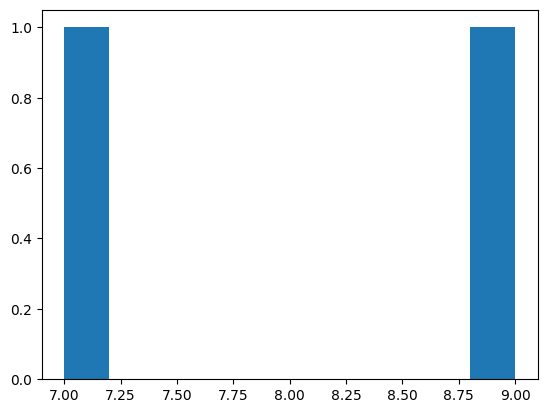

In [19]:
temp = df[df['passenger_count'] > 6]
plt.hist(temp['passenger_count'])

In [43]:
from datetime import datetime, timedelta

def convert_to_datetime(str_datetime):
  return datetime(int(str_datetime[:4]), int(str_datetime[5:7]), int(str_datetime[8:10]), int(str_datetime[11:13]), int(str_datetime[14:16]), int(str_datetime[17:19]))

count = 0
for index, row in df.iterrows():
  temp = (convert_to_datetime(row[3]) - convert_to_datetime(row[2])).total_seconds()
  if temp - int(row[-3]) != 0:
    print(index)
    print(temp - int(row[-3]))
    count += 1
print(count)

0


In [28]:
df.iloc[21813]

id                              id1864733
vendor_id                               1
pickup_datetime       2016-01-05 00:19:42
dropoff_datetime      2016-01-27 11:08:38
passenger_count                         1
pickup_longitude                -1.287872
pickup_latitude                  0.709364
dropoff_longitude                -1.29079
dropoff_latitude                 0.711625
store_and_fwd_flag                      N
trip_duration                     1939736
metres                         410.404532
speed                            0.000212
Name: 21813, dtype: object

pickup_longitude


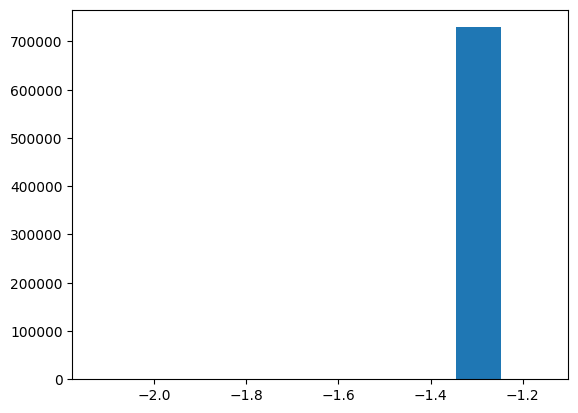

pickup_latitude


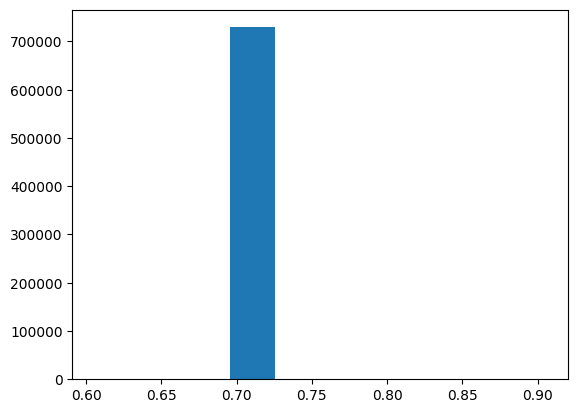

dropoff_longitude


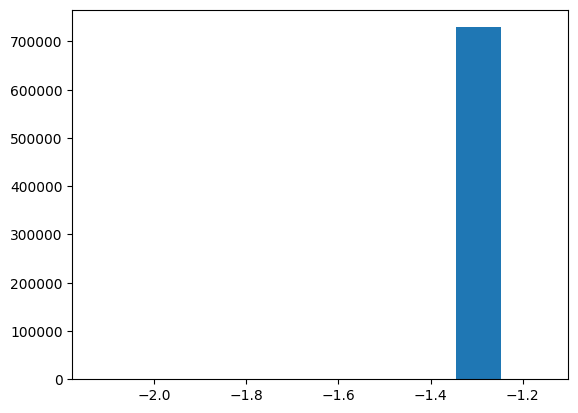

dropoff_latitude


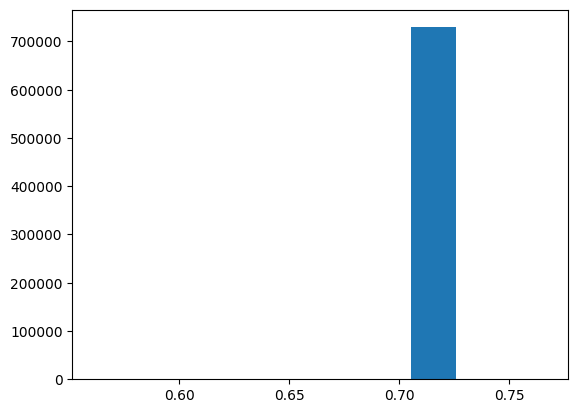

In [51]:
for x in geo_columns:
  plt.hist(df[x])
  print(x)
  plt.show()

In [54]:
for x in geo_columns:
  temp = round(df[x], 1)
  print(x)
  print(temp.unique())

pickup_longitude
[-1.3 -1.2 -1.4 -2.1]
pickup_latitude
[0.7 0.9 0.6 0.8]
dropoff_longitude
[-1.3 -1.2 -1.4 -2.1]
dropoff_latitude
[0.7 0.6 0.8]


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-2.62813829, -2.52813829, -2.42813829, -2.32813829, -2.22813829,
        -2.12813829, -2.02813829, -1.92813829, -1.82813829, -1.72813829,
        -1.62813829]),
 <BarContainer object of 10 artists>)

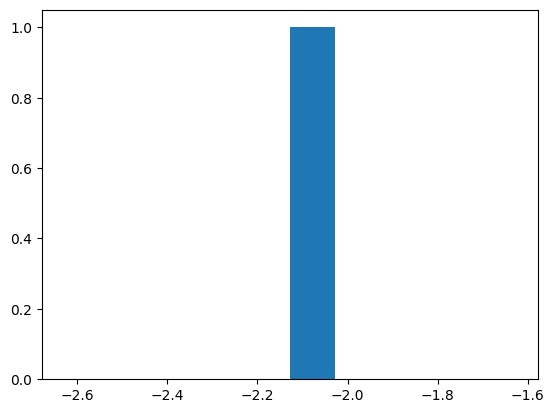

In [55]:
temp = df[df['pickup_longitude'] < -1.5]
plt.hist(temp['pickup_longitude'])